# Project Name: House Price Prediction
    The main aim of this project is to predict the house price based on various features

Life cycle of a Data Science Project
    >Data Analysis
    >Feature Engineering
    >Feature Selection
    >Model Development
    >Model Deployment

#Step1: Data Analysis phase , we basically will try to understand the data 

In [64]:
#import libraries such as pandas ,numpy , matplotlib for reading csv , working with arrays and visualisation respectively.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
#Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',10)
print(pd.get_option('display.max_columns'))

10


In [66]:
#Read the csv file using pandas
df = pd.read_csv('train.csv')

In [67]:
#Reading the first 5 records using head() function
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,...,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,...,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,...,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,...,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,...,12,2008,WD,Normal,250000


In [68]:
#Reading the last 5 records using tail
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,...,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,...,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,...,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,...,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,...,6,2008,WD,Normal,147500


In [69]:
#Read the total number of rows and column using shape
df.shape

(1460, 81)

In [70]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

For analysis , we will start dealing with the MISSING values

In [71]:
#List of features which has missing values
features_with_nan = [features for features in df.columns if df[features].isnull().sum() > 1]
features_with_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [72]:
#We will check the percentage of missing value
for features in features_with_nan:
    print(features , 'has',np.round(df[features].isnull().sum().mean(),4 ),'percentage of missing values' )

LotFrontage has 259.0 percentage of missing values
Alley has 1369.0 percentage of missing values
MasVnrType has 8.0 percentage of missing values
MasVnrArea has 8.0 percentage of missing values
BsmtQual has 37.0 percentage of missing values
BsmtCond has 37.0 percentage of missing values
BsmtExposure has 38.0 percentage of missing values
BsmtFinType1 has 37.0 percentage of missing values
BsmtFinType2 has 38.0 percentage of missing values
FireplaceQu has 690.0 percentage of missing values
GarageType has 81.0 percentage of missing values
GarageYrBlt has 81.0 percentage of missing values
GarageFinish has 81.0 percentage of missing values
GarageQual has 81.0 percentage of missing values
GarageCond has 81.0 percentage of missing values
PoolQC has 1453.0 percentage of missing values
Fence has 1179.0 percentage of missing values
MiscFeature has 1406.0 percentage of missing values


Since, There are many missing values we need to understand the relationship between missing values and salesprice
Plot the graphs

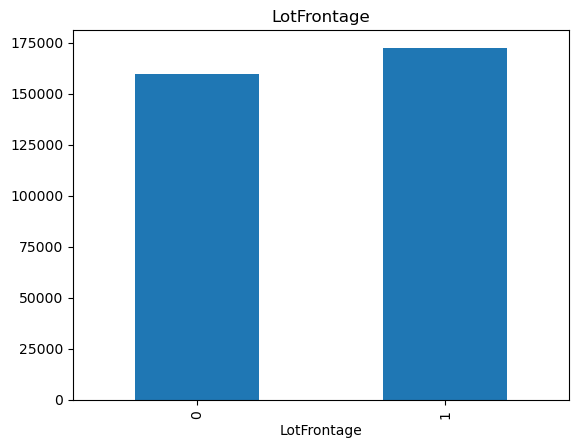

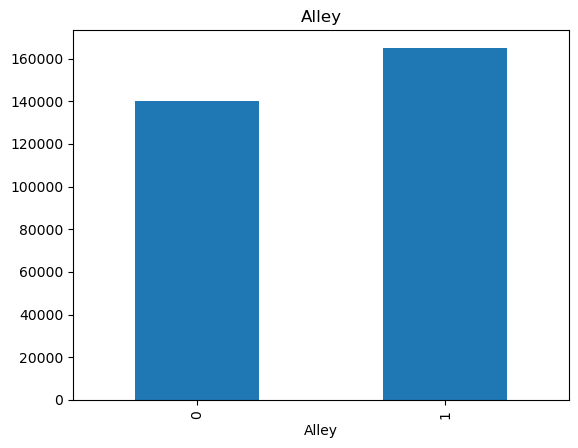

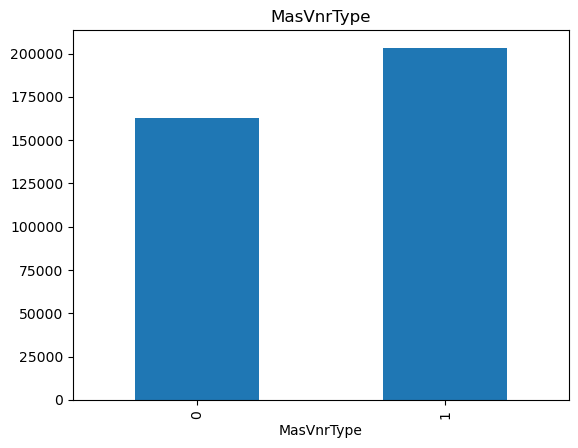

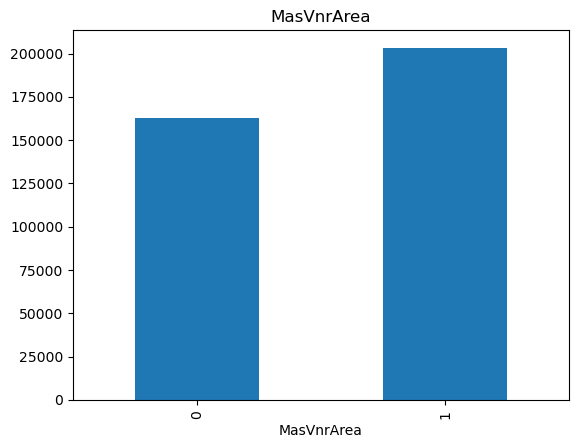

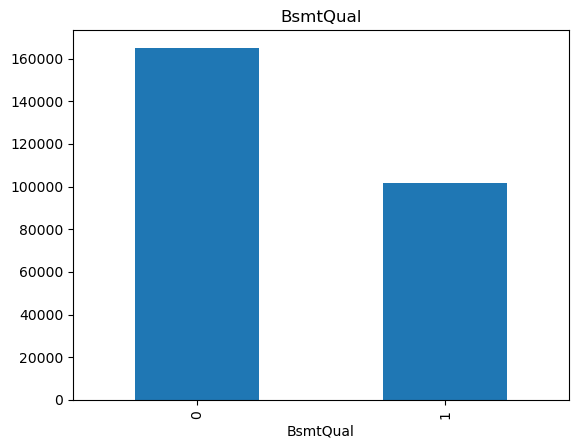

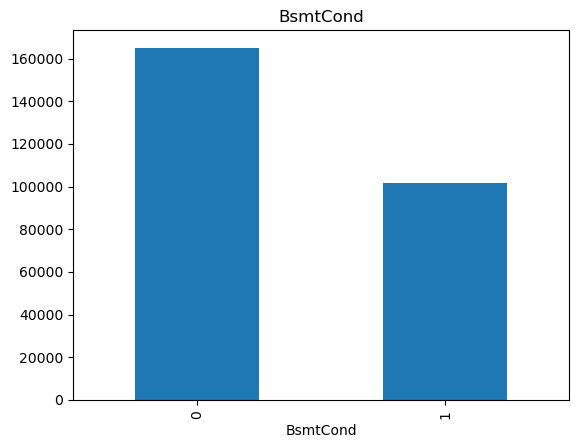

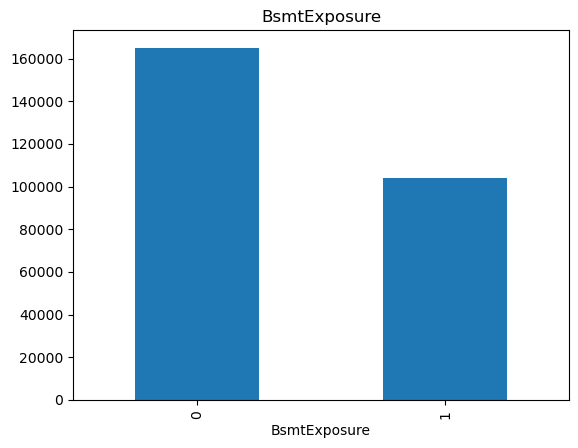

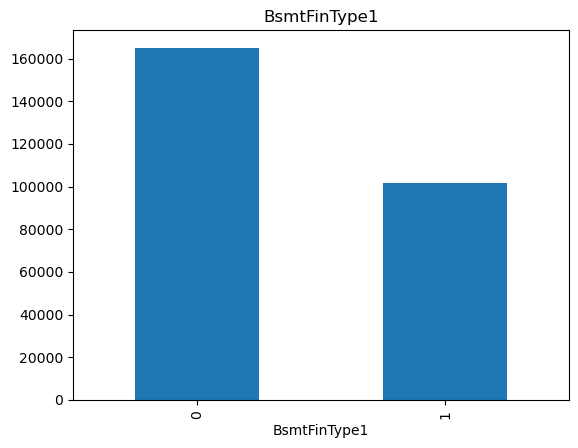

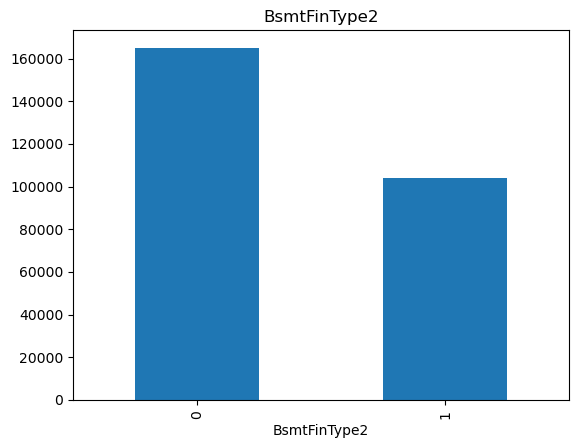

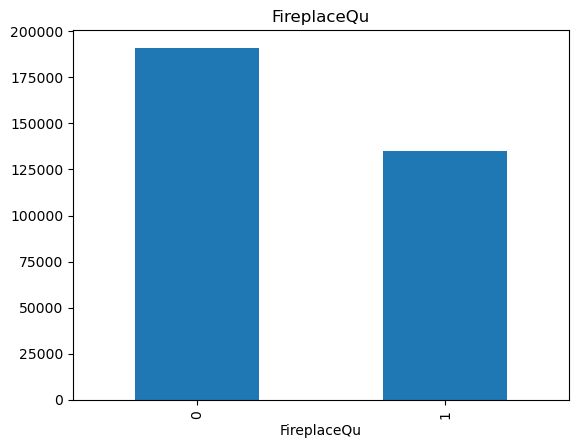

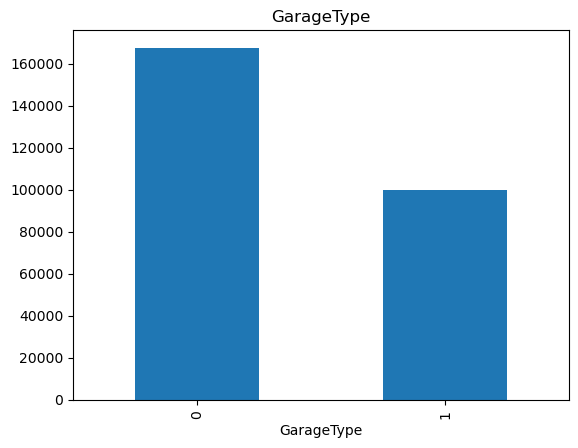

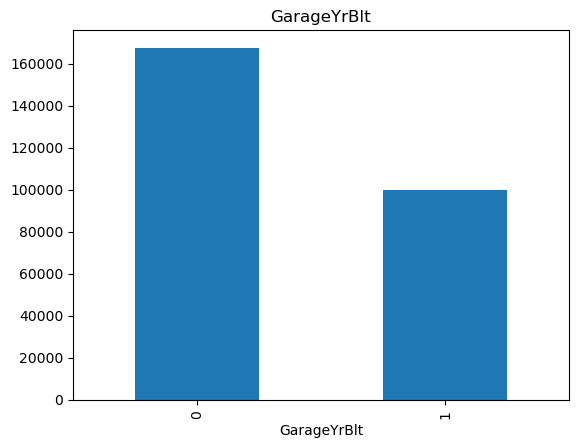

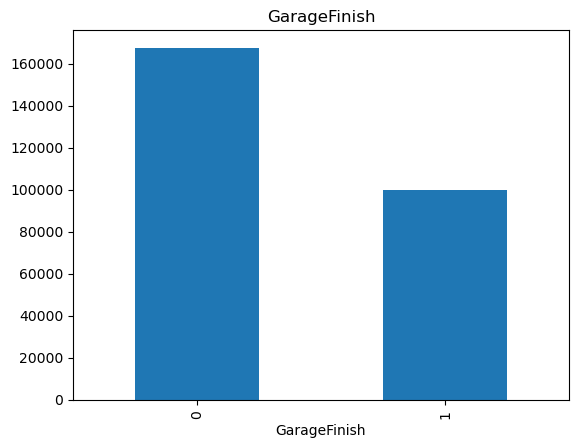

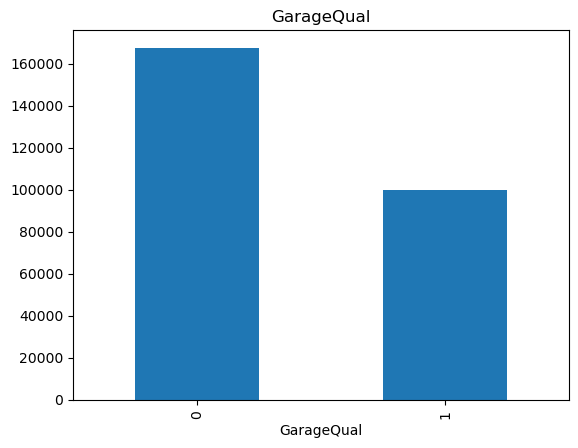

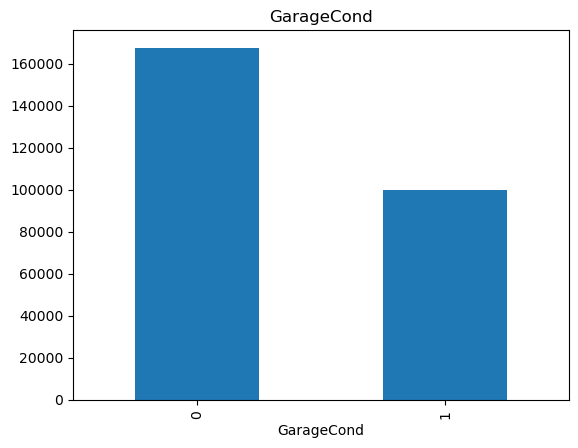

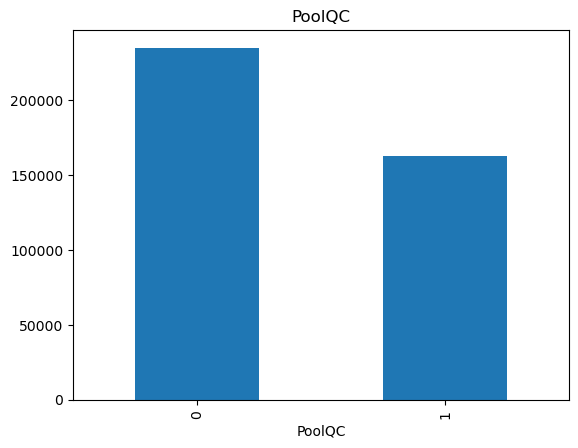

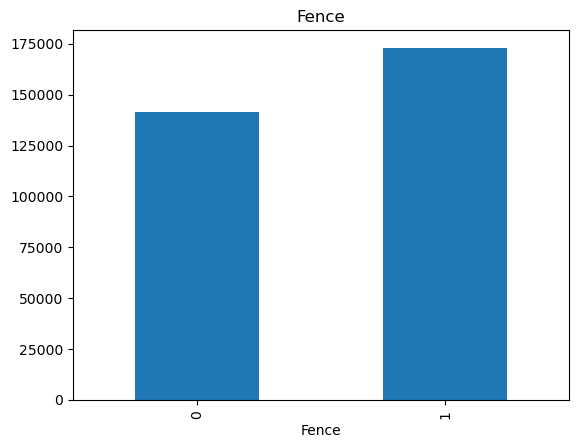

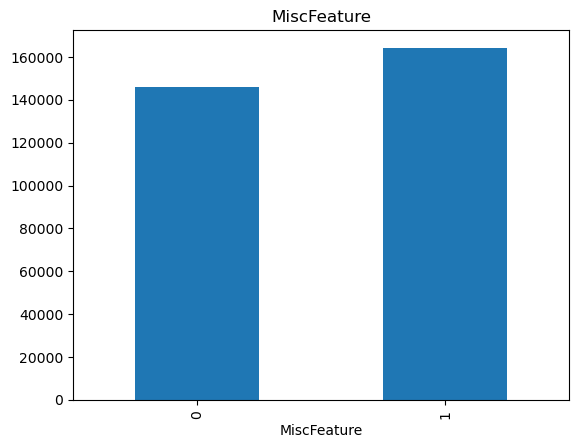

In [73]:
for features in features_with_nan:
    data = df.copy()
    #Replace all the missing value with if has any , 0 otherwise
    data[features] = np.where(data[features].isnull(),1,0)
    
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.show()


Here, it is evidently clear that , With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with some meaningful values.

In [76]:
#From the dataset we do not require the feature id
print("Id's {}".format(len(df.Id)))

Id's 1460


In [81]:
#List of numerical values features
numerical_features = [features for features in data.columns if data[features].dtypes != 'O']

print("Number of features which has numerical value",len(numerical_features))

Number of features which has numerical value 39


In [82]:
#Let's have a look of the data set which has numerical value
data[numerical_features].head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,...,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,...,1,0,2,2008,208500
1,2,20,80.0,9600,6,...,1,0,5,2007,181500
2,3,60,68.0,11250,7,...,1,0,9,2008,223500
3,4,70,60.0,9550,7,...,1,0,2,2006,140000
4,5,60,84.0,14260,8,...,1,0,12,2008,250000
5,6,50,85.0,14115,5,...,0,700,10,2009,143000
6,7,20,75.0,10084,8,...,1,0,8,2007,307000
7,8,60,NaN,10382,7,...,0,350,11,2009,200000
8,9,50,51.0,6120,7,...,1,0,4,2008,129900
9,10,190,50.0,7420,5,...,1,0,1,2008,118000


Temporal Variables(Eg: Datetime Variables)
From the Dataset we have 4 datetime variables. We have to extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold.

In [84]:
year_features = [year_features for year_features in numerical_features if 'Yr' in year_features or 'Year' in year_features ]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [85]:
#Print the data for year features
for features in year_features:
    print(features , data[features].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'SoldYear VS SalesPrice')

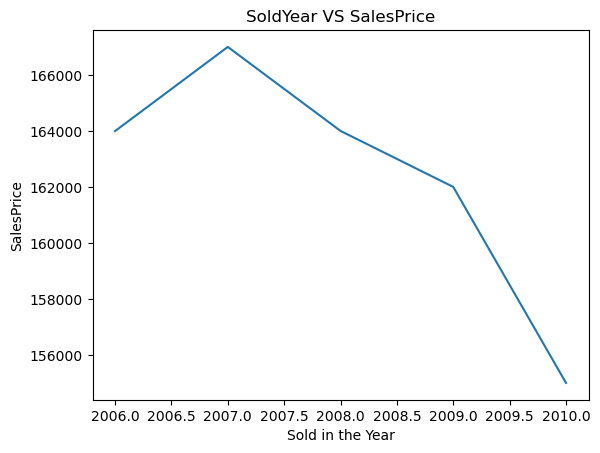

In [87]:
#Let's check the relation between year the house is sold and the sales price
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Sold in the Year')
plt.ylabel('SalesPrice')
plt.title('SoldYear VS SalesPrice')

In [89]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

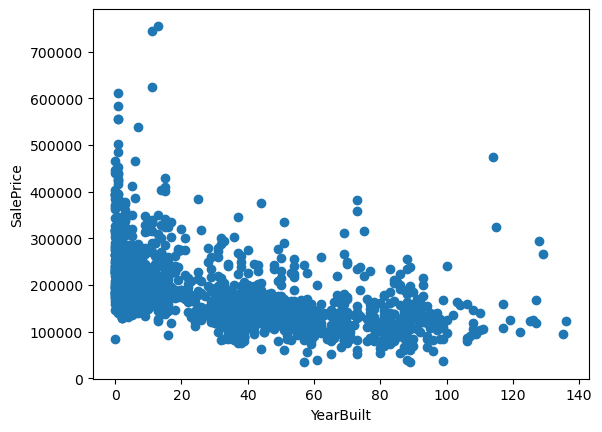

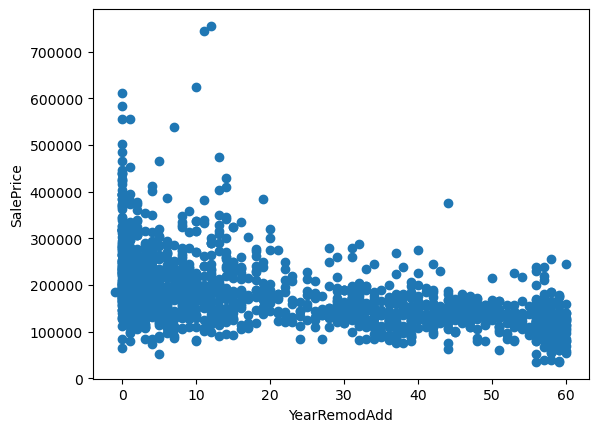

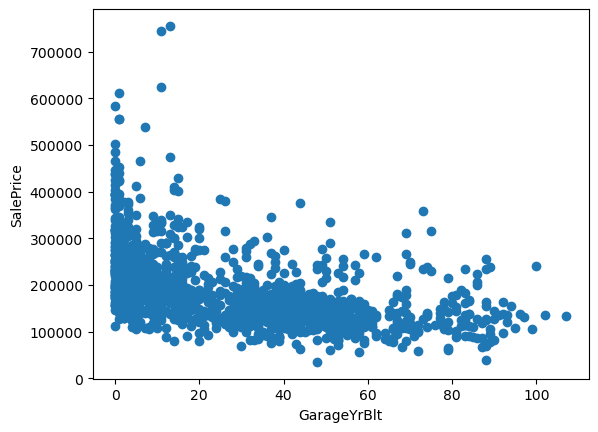

In [95]:
for features in year_features:
    if features!= 'YrSold':
        data = df.copy()
        #We will capture the difference between year variable and year the house was sold 
        data[features] = data['YrSold'] - data[features]
        plt.scatter(data[features],data['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.show()
    

In [ ]:
#Numerical variables are of two types
#Discrete and continous

In [120]:
discrete_features = [features for features in numerical_features if len(data[features].unique())<25 and features not in year_features+['Id']]
print('Discrete Variable {}'.format(len(discrete_features)))

Discrete Variable 18


In [107]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscFeature',
 'MiscVal',
 'MoSold']

In [121]:
data[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,...,3SsnPorch,PoolArea,MiscFeature,MiscVal,MoSold
0,60,7,5,0,1,...,0,0,NaN,0,2
1,20,6,8,0,0,...,0,0,NaN,0,5
2,60,7,5,0,1,...,0,0,NaN,0,9
3,70,7,5,0,1,...,0,0,NaN,0,2
4,60,8,5,0,1,...,0,0,NaN,0,12


In [ ]:
#Relation between discrete features and salesprice

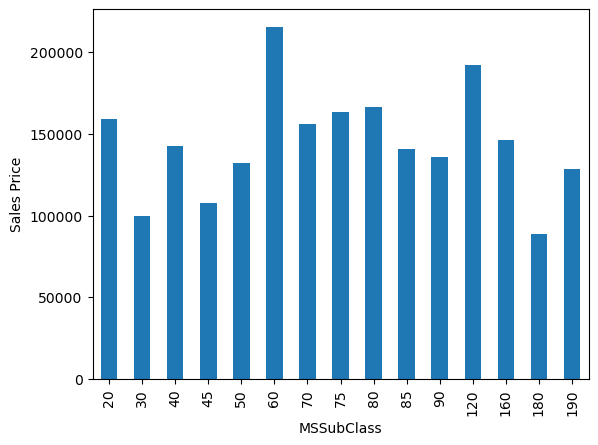

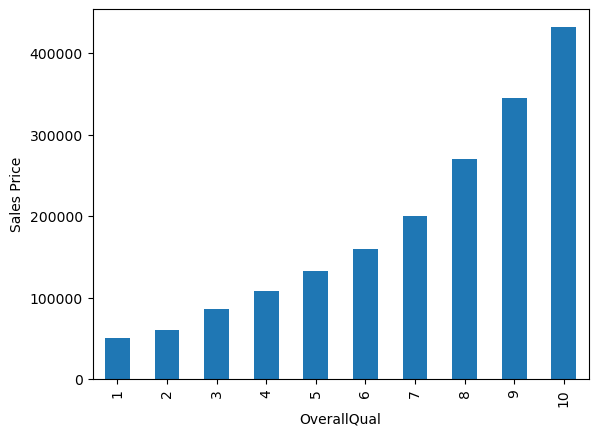

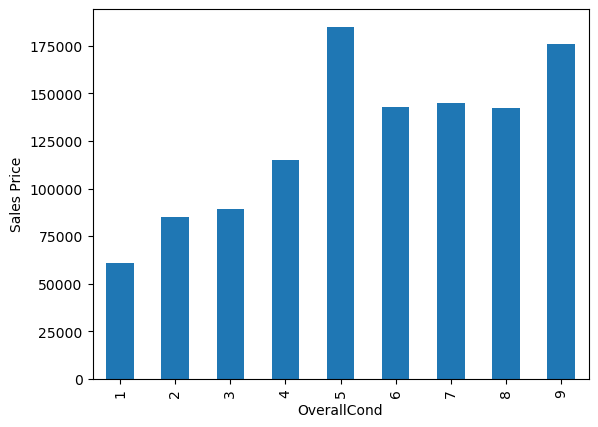

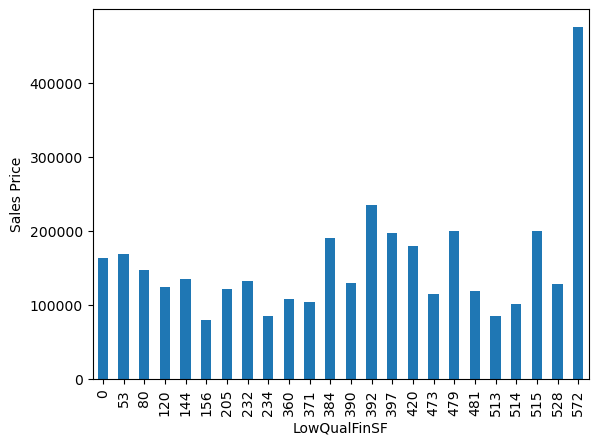

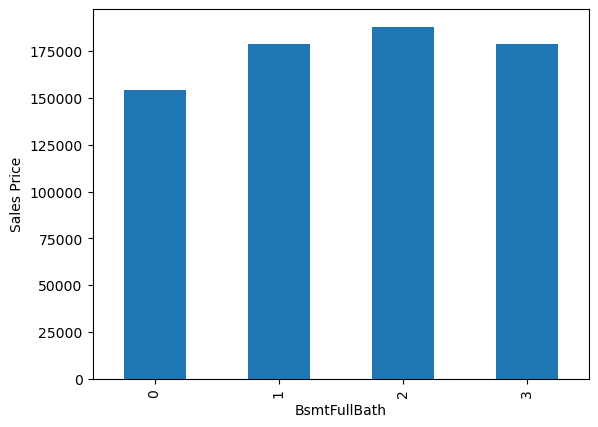

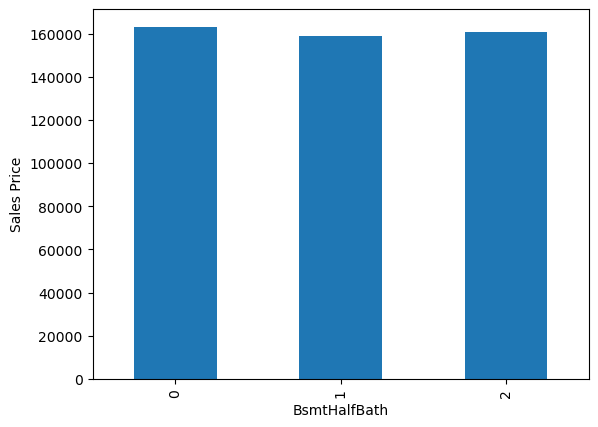

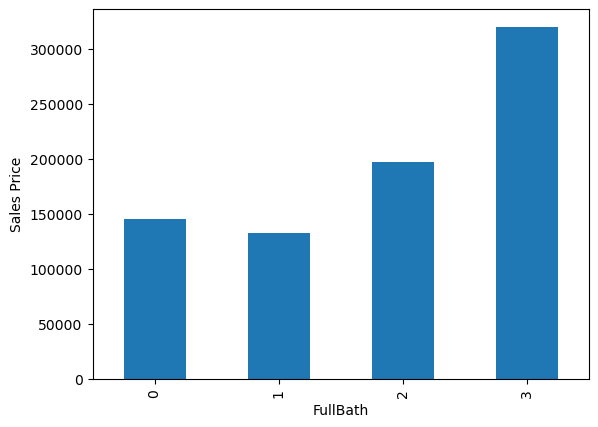

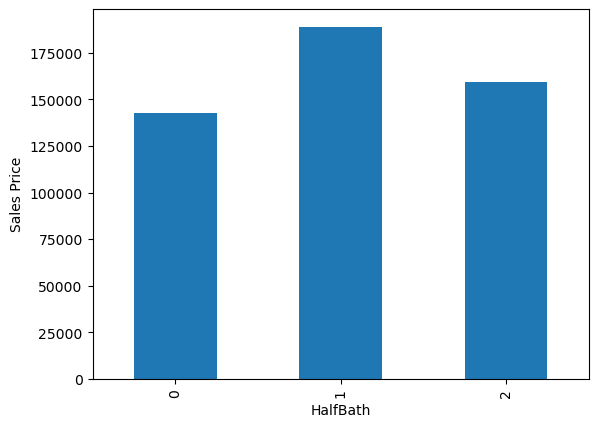

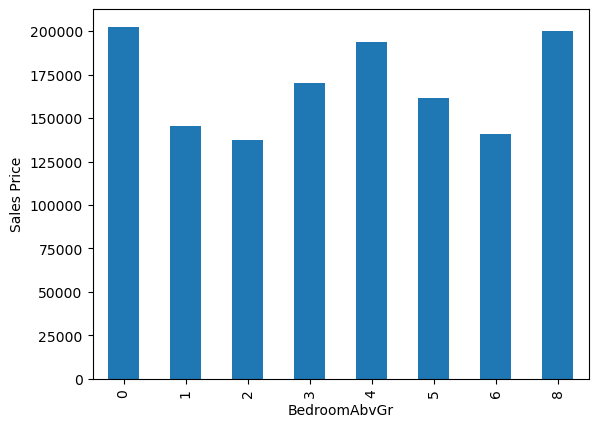

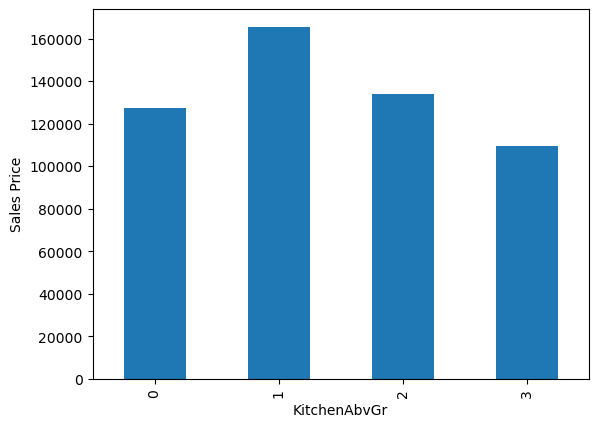

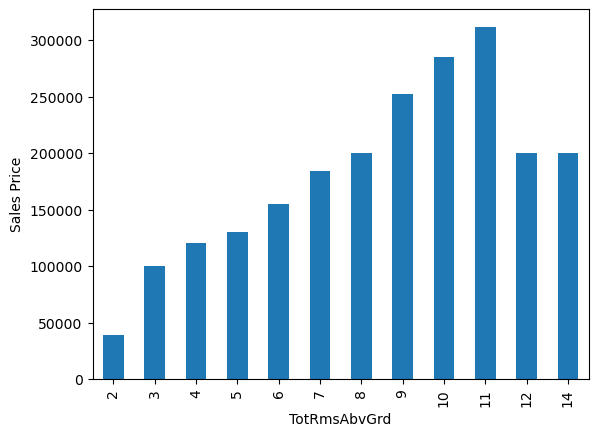

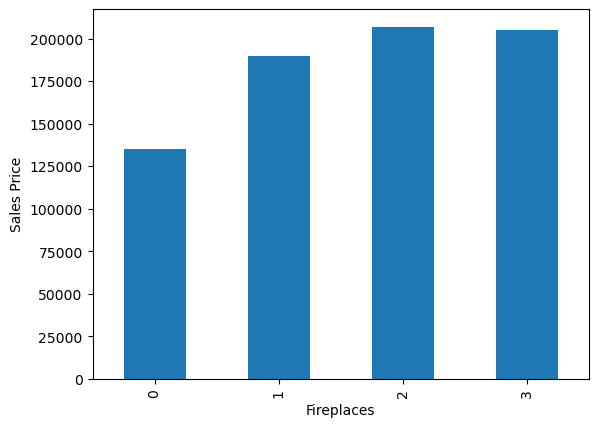

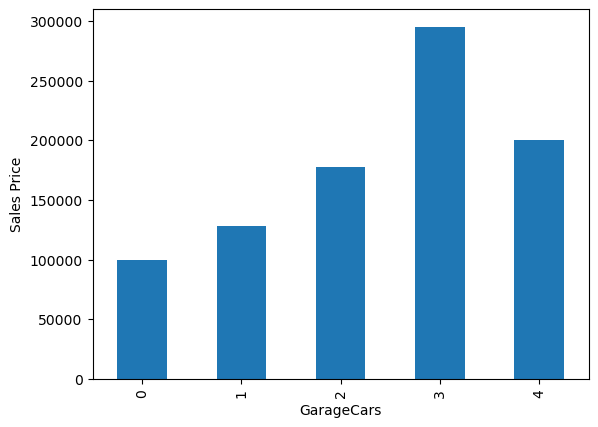

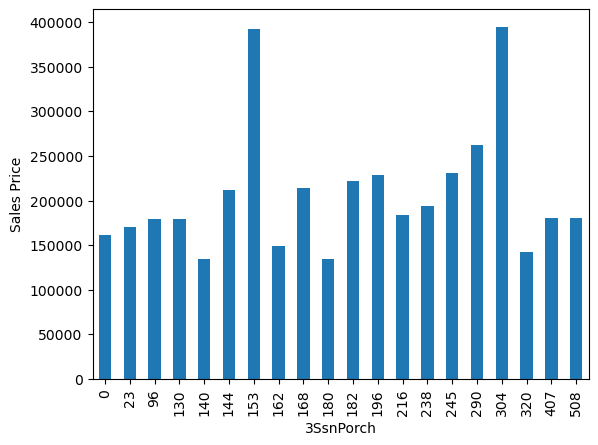

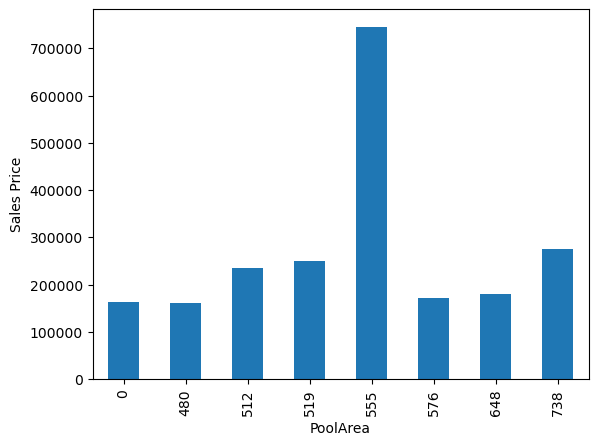

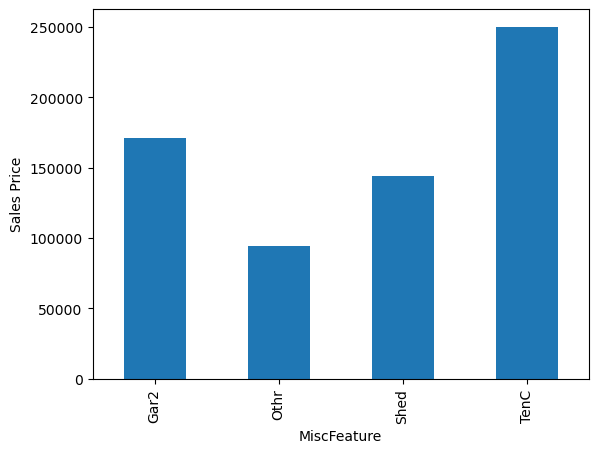

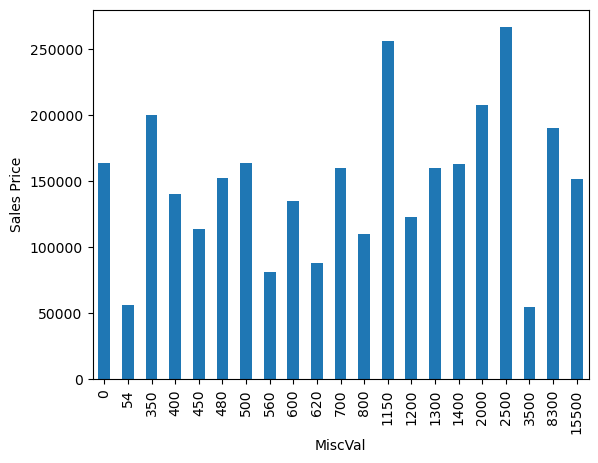

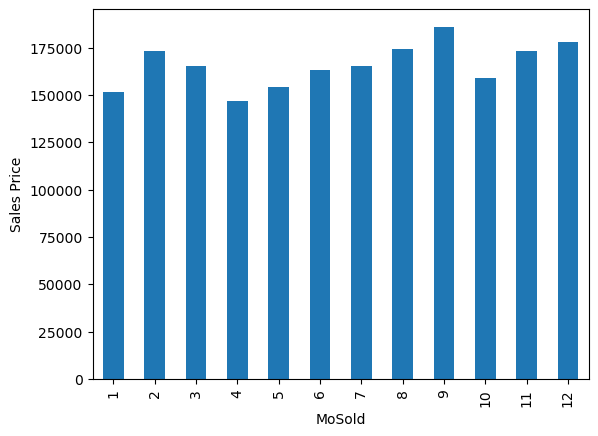

In [116]:
for features in discrete_features:
    data = df.copy()
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('Sales Price')
    plt.show()

In [ ]:
#Relation between Continous variable and salesprice

In [123]:
continous_features = [features for features in numerical_features if features not in discrete_features + year_features + ['Id']]
print('Continous Variable {}'.format(len(continous_features)))

Continous Variable 16


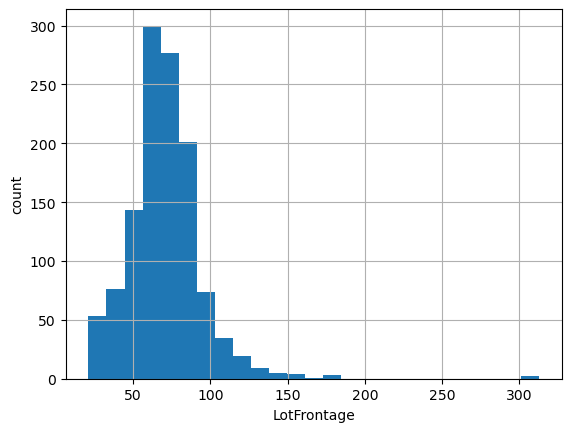

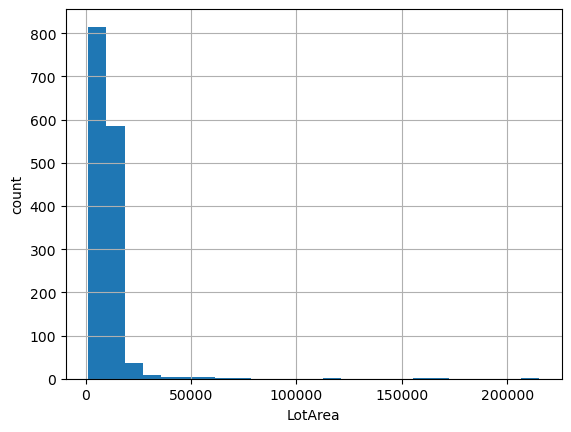

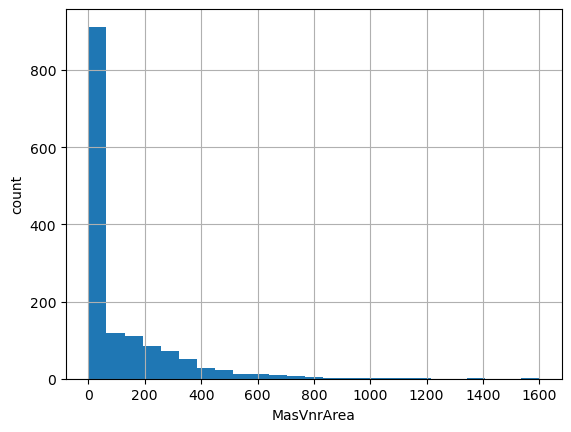

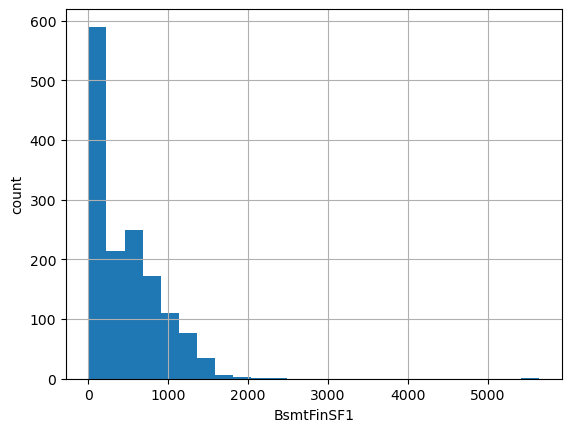

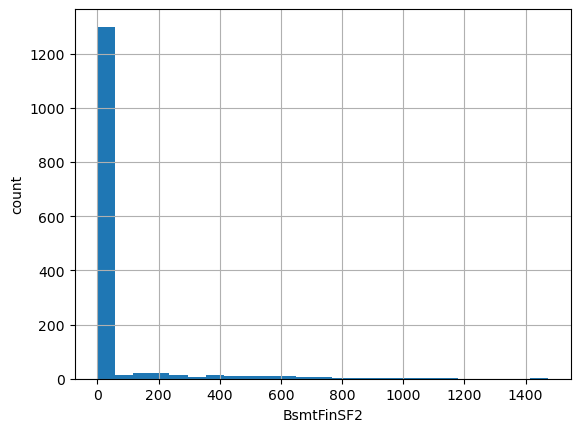

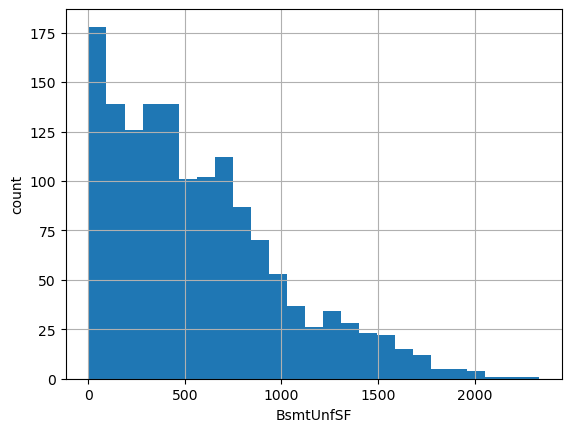

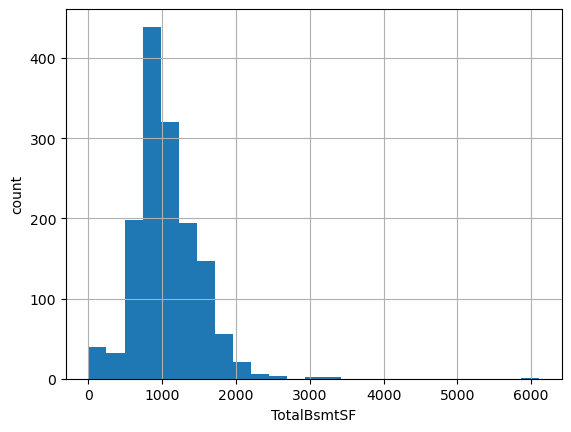

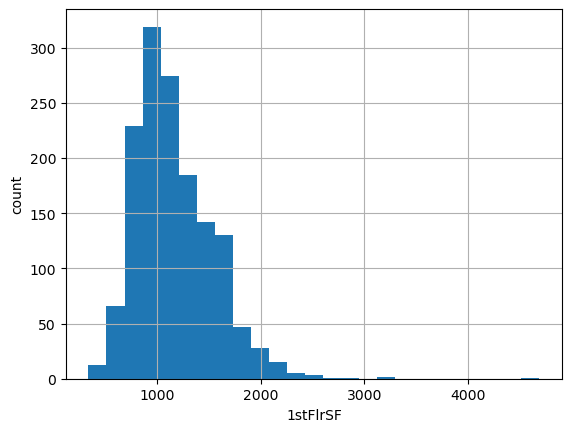

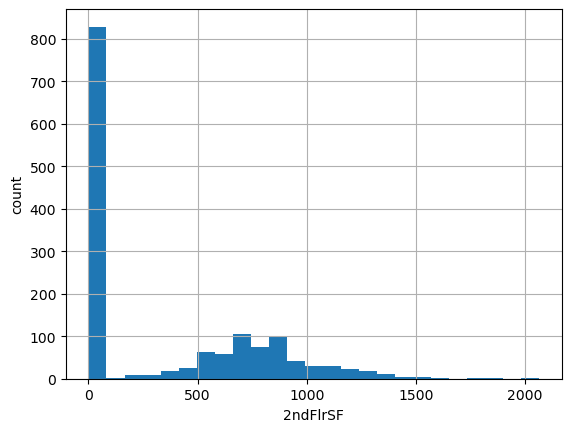

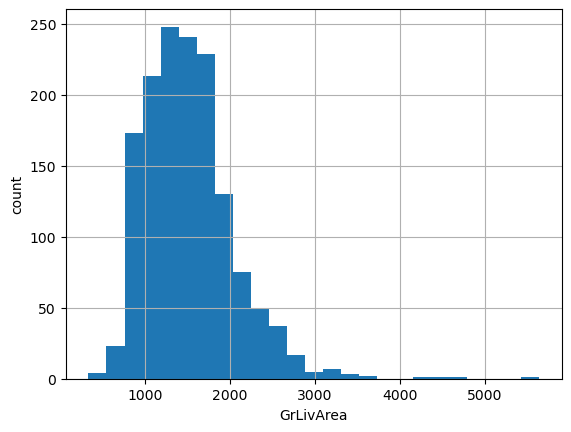

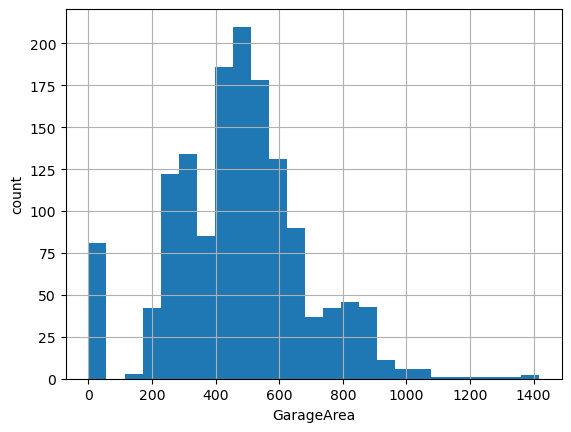

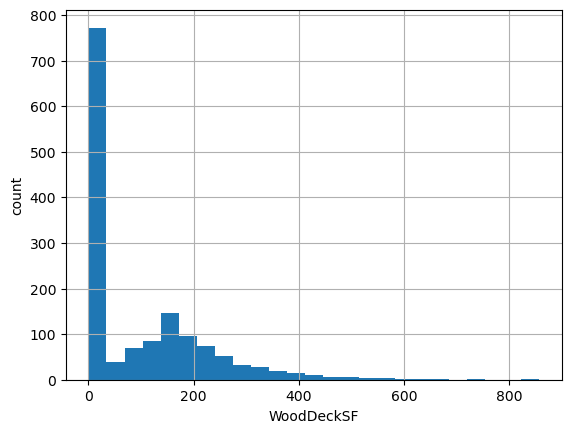

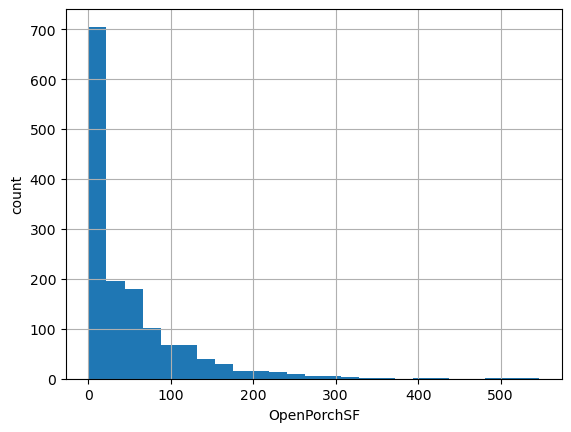

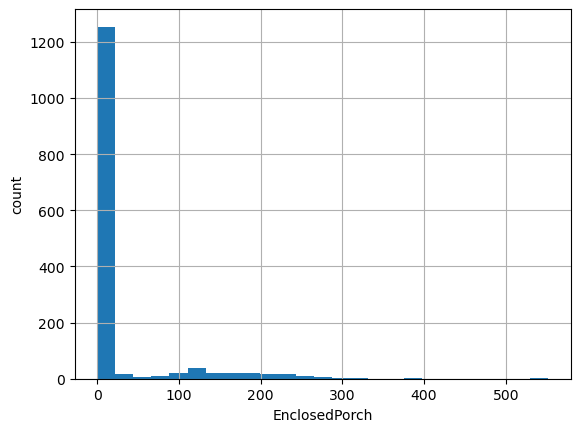

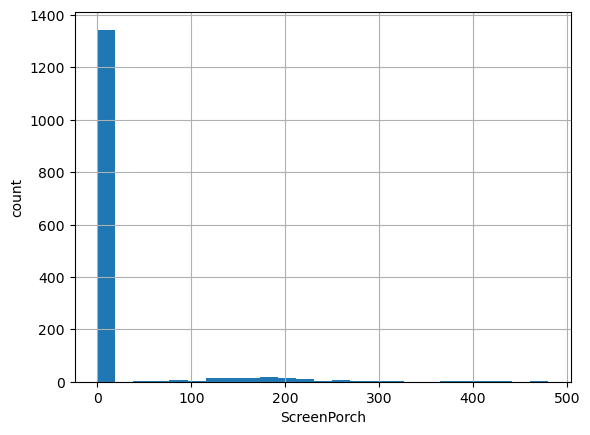

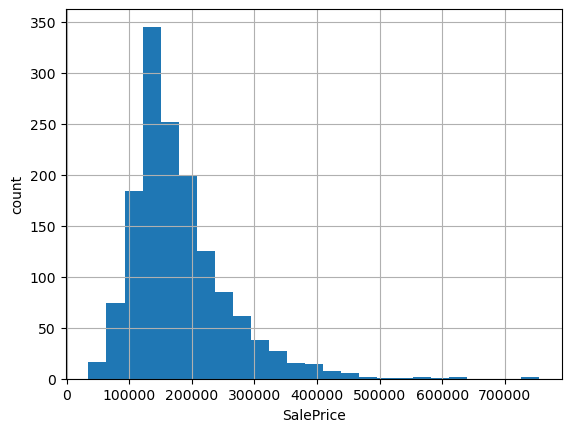

In [125]:
for features in continous_features:
    data = df.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("count")
    plt.show()